In [1]:
import cirq
import cirq_superstaq

In [2]:
service = Service(api_key="YOUR API KEY")

In [3]:
qubits = cirq.LineQubit.range(2)

In [4]:
circuit = cirq.Circuit(cirq_superstaq.AceCRPlusMinus(qubits[0], qubits[1]))

In [5]:
circuit

0: ───AceCR+-(Z side)───
      │
1: ───AceCR+-(X side)───

In [6]:
out = service.ibmq_compile(circuit, target="ibmq_jakarta")

/home/vtomole/venv4/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


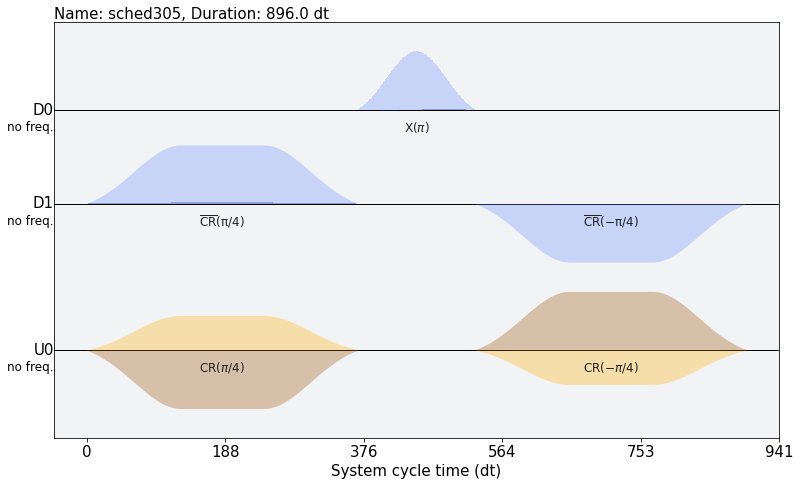

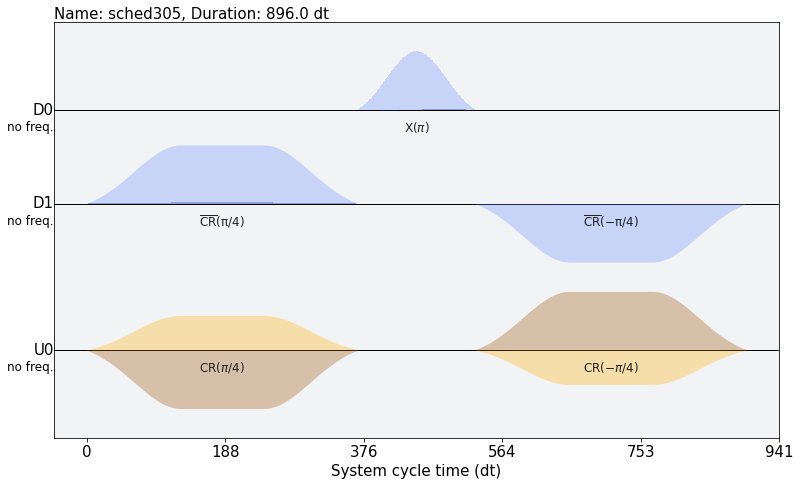

In [7]:
out.draw()